#  Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 
 

# Data Understanding and EDA

#### Importing, important python libraries required for model development

In [116]:
import numpy as np                                                             ## Importing numpy library
import pandas as pd                                                            ## importing pandas library
import matplotlib.pyplot as plt                                                ## importing mstplot library
import seaborn as sns                                                          ## imprting seaborn library
import statsmodels.api as sm                                                   ## importing statsmodels for statisctical data and Linear Regression
from sklearn import linear_model, metrics                                      ## importing sklearn scientific library
from sklearn.linear_model import LinearRegression                              ## importing Linear regression module from sklearn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures           ## importing StandardScaler and PolynomialFeatures module from sklearn         
from sklearn.feature_selection import RFE                                      ## importing RFE feature selection module from sklearn
from sklearn.model_selection import train_test_split                           ## importing train_test_split  module from sklearn library
from sklearn.model_selection import GridSearchCV                               ## importing GridSearchCV  from sklearn library
from sklearn.linear_model import Lasso                                         ## importing Lasso regularization module from sklearn library
from sklearn.linear_model import Ridge                                         ## importing Ridge regularization module from sklearn library
from sklearn.metrics import mean_squared_error, r2_score                       ## importing mean_squared_error, r2_score from sklearn library
from sklearn.model_selection import cross_val_score                            ## importing cross_val_score module from sklearn library
from sklearn.model_selection import KFold                                      ## importing KFold module from sklearn library
import os
import warnings
warnings.filterwarnings('ignore') ## it will help to ignore unwanted warnings

#### Request user to input file path for analysis

In [117]:
House_Data_Path=input("Enter Input File Path For Analysis")

Enter Input File Path For AnalysisC:\Users\chand\OneDrive\Desktop\Housing\train.csv


#### Loading input data set to Dataframe

In [118]:
House_Data=pd.read_csv(House_Data_Path)
House_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Get number of rows and columns

In [119]:
House_Data.shape

(1460, 81)

#### Get loaded data data type

In [120]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Check null values for the columns of dataset


In [121]:
for column  in House_Data.columns:
    print (column + "--->"+ str(House_Data[column].isnull().sum()))

Id--->0
MSSubClass--->0
MSZoning--->0
LotFrontage--->259
LotArea--->0
Street--->0
Alley--->1369
LotShape--->0
LandContour--->0
Utilities--->0
LotConfig--->0
LandSlope--->0
Neighborhood--->0
Condition1--->0
Condition2--->0
BldgType--->0
HouseStyle--->0
OverallQual--->0
OverallCond--->0
YearBuilt--->0
YearRemodAdd--->0
RoofStyle--->0
RoofMatl--->0
Exterior1st--->0
Exterior2nd--->0
MasVnrType--->8
MasVnrArea--->8
ExterQual--->0
ExterCond--->0
Foundation--->0
BsmtQual--->37
BsmtCond--->37
BsmtExposure--->38
BsmtFinType1--->37
BsmtFinSF1--->0
BsmtFinType2--->38
BsmtFinSF2--->0
BsmtUnfSF--->0
TotalBsmtSF--->0
Heating--->0
HeatingQC--->0
CentralAir--->0
Electrical--->1
1stFlrSF--->0
2ndFlrSF--->0
LowQualFinSF--->0
GrLivArea--->0
BsmtFullBath--->0
BsmtHalfBath--->0
FullBath--->0
HalfBath--->0
BedroomAbvGr--->0
KitchenAbvGr--->0
KitchenQual--->0
TotRmsAbvGrd--->0
Functional--->0
Fireplaces--->0
FireplaceQu--->690
GarageType--->81
GarageYrBlt--->81
GarageFinish--->81
GarageCars--->0
GarageArea--

#### Evaluating which column has more than 70 percentage of missing values

In [122]:
for column in House_Data.columns:
    if round(100 * (House_Data[column].isnull().sum()/len(House_Data[column].index)), 2) > 70:
        print(column+" "+str(round(100 * (House_Data[column].isnull().sum()/len(House_Data[column].index)), 2)))

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


## Data Preparation steps :

### Removing columns which having more than 70 percentage of missing values

In [123]:
House_Data=House_Data.drop(House_Data.loc[:,list(round(100 * (House_Data.isnull().sum()/len(House_Data.index)),2)>70)].columns,1)
House_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Re-validation of missing values after removing values in above cell

In [125]:
list(round(100 * (House_Data.isnull().sum()/len(House_Data.index)),2)>10)

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

## Checking which column has now the highest percentage of missing values

In [126]:
for column in House_Data.columns:
    print(column+"--->"+str(round(100 * (House_Data[column].isnull().sum()/len(House_Data[column].index)), 2)))

Id--->0.0
MSSubClass--->0.0
MSZoning--->0.0
LotFrontage--->17.74
LotArea--->0.0
Street--->0.0
LotShape--->0.0
LandContour--->0.0
Utilities--->0.0
LotConfig--->0.0
LandSlope--->0.0
Neighborhood--->0.0
Condition1--->0.0
Condition2--->0.0
BldgType--->0.0
HouseStyle--->0.0
OverallQual--->0.0
OverallCond--->0.0
YearBuilt--->0.0
YearRemodAdd--->0.0
RoofStyle--->0.0
RoofMatl--->0.0
Exterior1st--->0.0
Exterior2nd--->0.0
MasVnrType--->0.55
MasVnrArea--->0.55
ExterQual--->0.0
ExterCond--->0.0
Foundation--->0.0
BsmtQual--->2.53
BsmtCond--->2.53
BsmtExposure--->2.6
BsmtFinType1--->2.53
BsmtFinSF1--->0.0
BsmtFinType2--->2.6
BsmtFinSF2--->0.0
BsmtUnfSF--->0.0
TotalBsmtSF--->0.0
Heating--->0.0
HeatingQC--->0.0
CentralAir--->0.0
Electrical--->0.07
1stFlrSF--->0.0
2ndFlrSF--->0.0
LowQualFinSF--->0.0
GrLivArea--->0.0
BsmtFullBath--->0.0
BsmtHalfBath--->0.0
FullBath--->0.0
HalfBath--->0.0
BedroomAbvGr--->0.0
KitchenAbvGr--->0.0
KitchenQual--->0.0
TotRmsAbvGrd--->0.0
Functional--->0.0
Fireplaces--->0.0
Fi

### Moving onwards we will sequentially choose one by one columns which is having highest number of missing values for analysis and fill the null values with the most of occuring values

### Starting my analysis from the column name  "FireplaceQu" ,because it is having highest number of missing values and trying to understanding the impact of this column.

In [127]:
House_Data["FireplaceQu"].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

### Univariate analysis on column name "FireplaceQu"

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

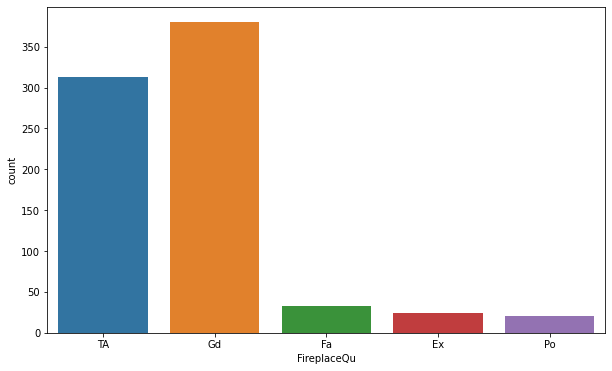

In [128]:
plt.figure(figsize=(10,6))
sns.countplot(House_Data["FireplaceQu"])

#### In the above good and average are the top values ,  selecting either of them would be difficult. So we will add another class  "unknown" and replace null values present in column name "FireplaceQu" with "Unknown".

In [129]:
House_Data["FireplaceQu"] = House_Data["FireplaceQu"].fillna("Unknown")

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

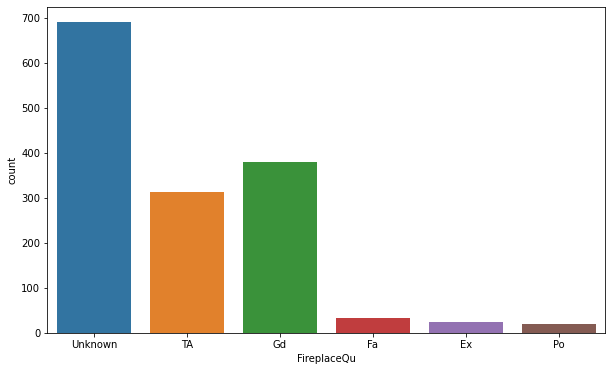

In [130]:
plt.figure(figsize=(10,6))
sns.countplot(House_Data["FireplaceQu"])

####  we will consider second column name "LotFrontage" for analysis since it is haing second highest missing values

In [131]:
House_Data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Checking for outliers

<AxesSubplot:xlabel='LotFrontage'>

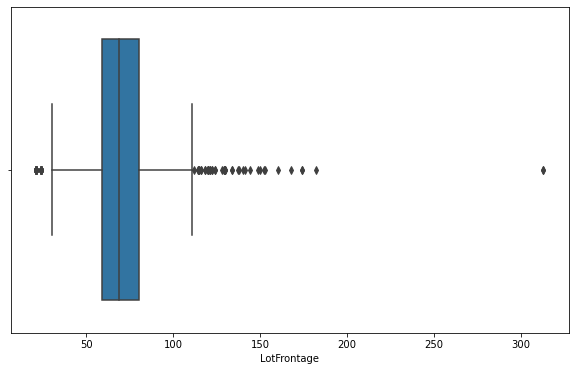

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(House_Data["LotFrontage"])

In [133]:
House_Data["LotFrontage"].mean()  ## Get the means for column LotFrontage

70.04995836802665

#### Now we will fill null value with mean

In [134]:
House_Data["LotFrontage"] = House_Data["LotFrontage"].replace(np.NaN,House_Data["LotFrontage"].mean())

#### Since outliers are present in the data we will now remove them 

In [135]:

House_Data["LotFrontage"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
5%         35.950000
25%        60.000000
50%        70.049958
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

#### We will cap the value to 95 percentile

In [136]:
percentiles_95 = House_Data["LotFrontage"].quantile([0.05,0.95]).values

In [137]:
percentiles_95   #getting value for percentiles_95

array([ 35.95, 104.  ])

In [138]:
House_Data["LotFrontage"][House_Data["LotFrontage"] <= percentiles_95[0]] = percentiles_95[0]
House_Data["LotFrontage"][House_Data["LotFrontage"] >= percentiles_95[1]] = percentiles_95[1]

#### Plot boxplot for outliers

<AxesSubplot:xlabel='LotFrontage'>

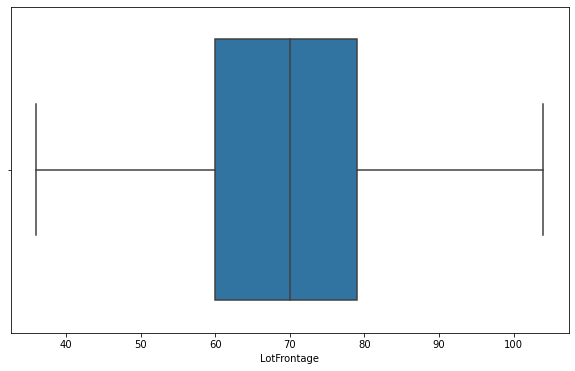

In [139]:
plt.figure(figsize=(10,6))
sns.boxplot(House_Data["LotFrontage"])

#### Garage is one of the important column when it comes to house purchasing and it is having 3rd highest missing values. We are starting our analysis on GarageType, GarageQual,GarageFinish,GarageCond

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

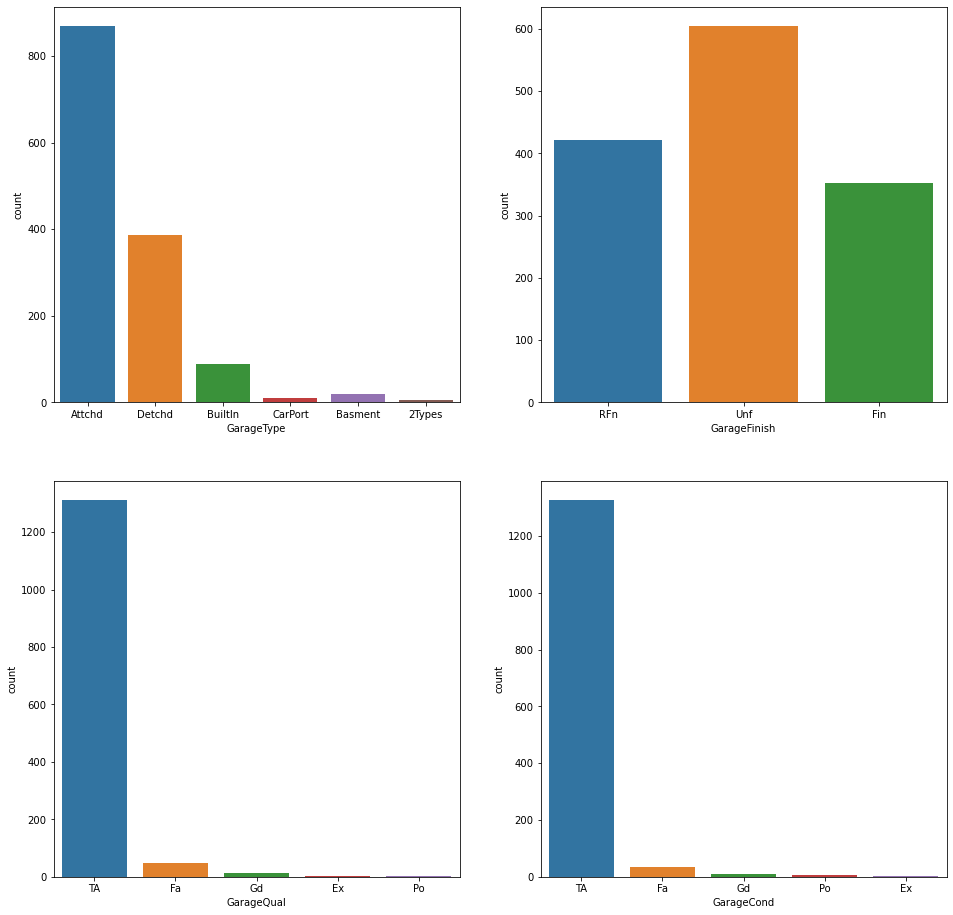

In [140]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.countplot(House_Data["GarageType"])
plt.subplot(2,2,2)
sns.countplot(House_Data["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(House_Data["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(House_Data["GarageCond"])

GarageType ----> Most values are of type "Attchd" so we replace NULL values with "Attchd"

GarageFinish -----> Most values are of type "Unf" so we replace NULL values with "Unf"

GarageQual -----> Most values are of type "TA" so we replace NULL values with "TA"

GarageCond-----> Most values are of type "TA" so we replace NULL values with "TA"

In [141]:

House_Data["GarageType"] = House_Data["GarageType"].fillna("Attchd")
House_Data["GarageFinish"] = House_Data["GarageFinish"].fillna("Unf")
House_Data["GarageQual"] = House_Data["GarageQual"].fillna("TA")
House_Data["GarageCond"] = House_Data["GarageCond"].fillna("TA")

#### We will check the column GarageYrBlt to understand how old garages are present and fill null values

In [142]:
House_Data["GarageYrBlt"].value_counts()


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

#### We will replace null value in column  GarageYrBlt with 2005 as it occurs most  and can be seen above.

In [143]:
House_Data["GarageYrBlt"] = House_Data["GarageYrBlt"].replace(np.NaN,2005)

#### Now we will take basement columns for analysis and fill "null" values 

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

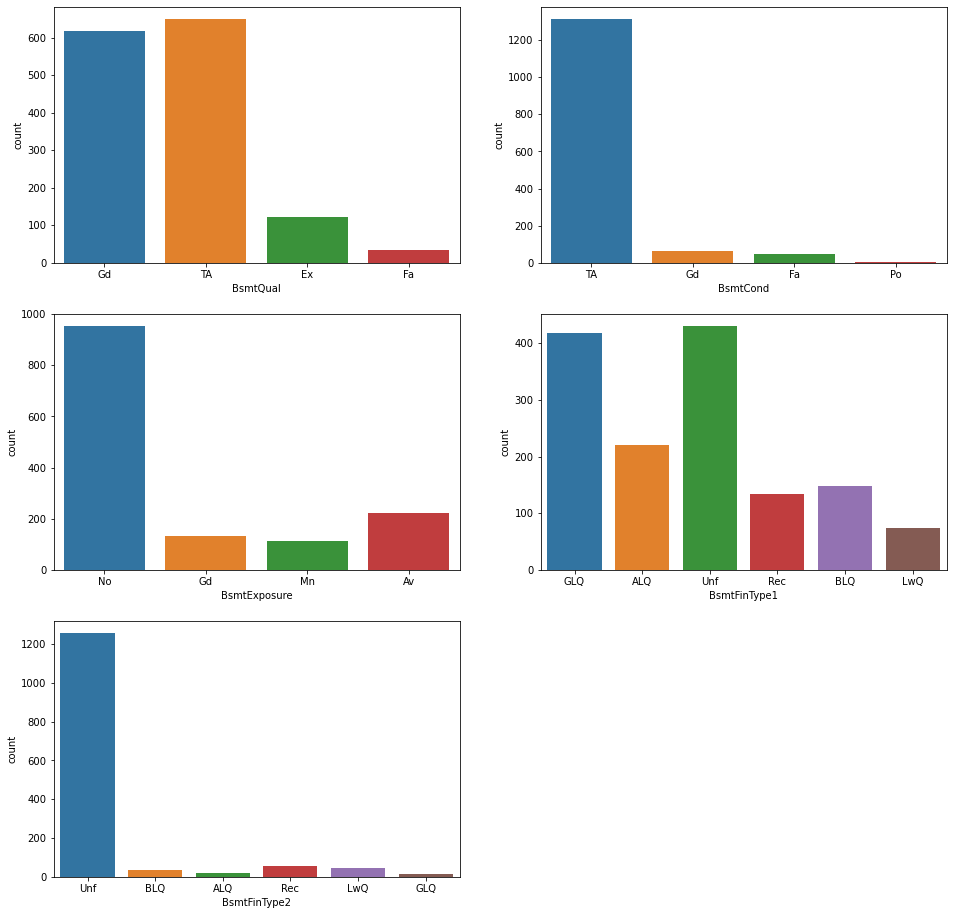

In [144]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
sns.countplot(House_Data["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(House_Data["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(House_Data["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(House_Data["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(House_Data["BsmtFinType2"])

BsmtQual---> Most values are of type "TA" so we replace NULL values with "TA"

BsmtCond---->Most values are of type "TA" so we replace NULL values with "TA"

BsmtExposure---->Most values are of type "No" so we replace NULL values with "No"

BsmtFinType1----> Most values are of type "Unf" so we replace NULL values with "Unf"

BsmtFinType2----> Most values are of type "Unf" so we replace NULL values with "Unf"

In [145]:
House_Data["BsmtQual"] = House_Data["BsmtQual"].fillna("TA")
House_Data["BsmtCond"] = House_Data["BsmtCond"].fillna("TA")
House_Data["BsmtExposure"] = House_Data["BsmtExposure"].fillna("No")
House_Data["BsmtFinType1"] = House_Data["BsmtFinType1"].fillna("Unf")
House_Data["BsmtFinType2"] = House_Data["BsmtFinType2"].fillna("Unf")

#### We will now start our analysis on column MasVnrType, MasVnrArea and fill null values



<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

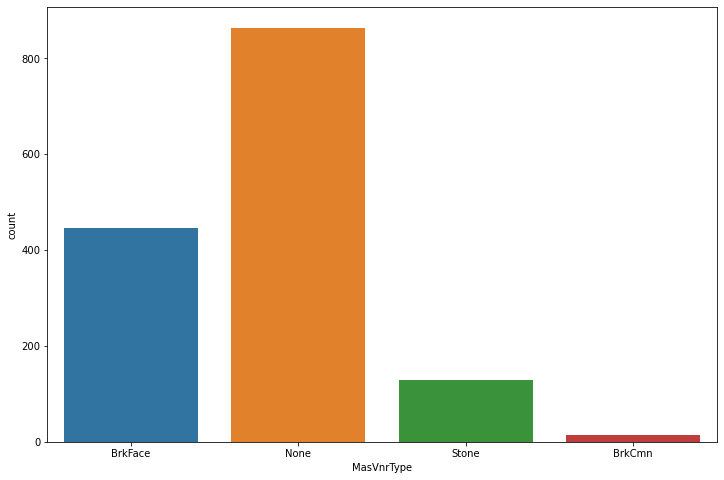

In [146]:
plt.figure(figsize=(12,8))
sns.countplot(House_Data["MasVnrType"])

#### Most values are "None" so we replace NULL value with "None"

In [147]:
House_Data["MasVnrType"] = House_Data["MasVnrType"].fillna("None")

#### We will now analyse variable "MasVnrArea" and fill the null values

In [148]:
House_Data["MasVnrArea"].value_counts()  ## Get the count for column MasVnrArea

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

#### Most values are 0 so we will replace NULL values with 0

In [149]:
House_Data["MasVnrArea"] = House_Data["MasVnrArea"].fillna(0.0)

#### Now we will analyse Electrical column and fill the null values

<AxesSubplot:xlabel='Electrical', ylabel='count'>

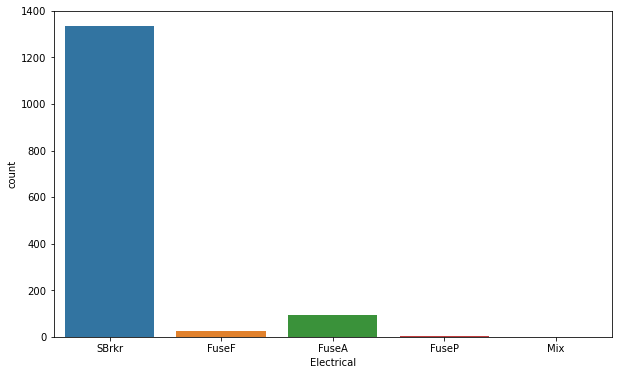

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(House_Data["Electrical"])

#### Most values are "SBrkr" so we replace NULL values with "SBrkr"

In [151]:

House_Data["Electrical"] = House_Data["Electrical"].fillna("SBrkr")

#### Checking Null value now for all column

In [152]:
for column in House_Data.columns:
    print(column+" "+str(round(100 * (House_Data[column].isnull().sum()/len(House_Data[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.0
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
MasVnrArea 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinSF1 0.0
BsmtFinType2 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageCars 0.0
GarageArea 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
Enclosed

#### Output---> Now we can see from above output that all column missing value is 0. We have replcaed all the columns missing       values with most occuring values in that columns

#### Now we will change data types of the few columns which will help in model building and analysis

In [153]:
House_Data["GarageYrBlt"].value_counts()

2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
         ... 
1927.0      1
1900.0      1
1906.0      1
1908.0      1
1933.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [154]:
House_Data["GarageYrBlt"] = House_Data["GarageYrBlt"].astype('int64')

In [155]:
House_Data.info()  ## Checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Now we will plot heatmap to check correlation coefficient

<AxesSubplot:>

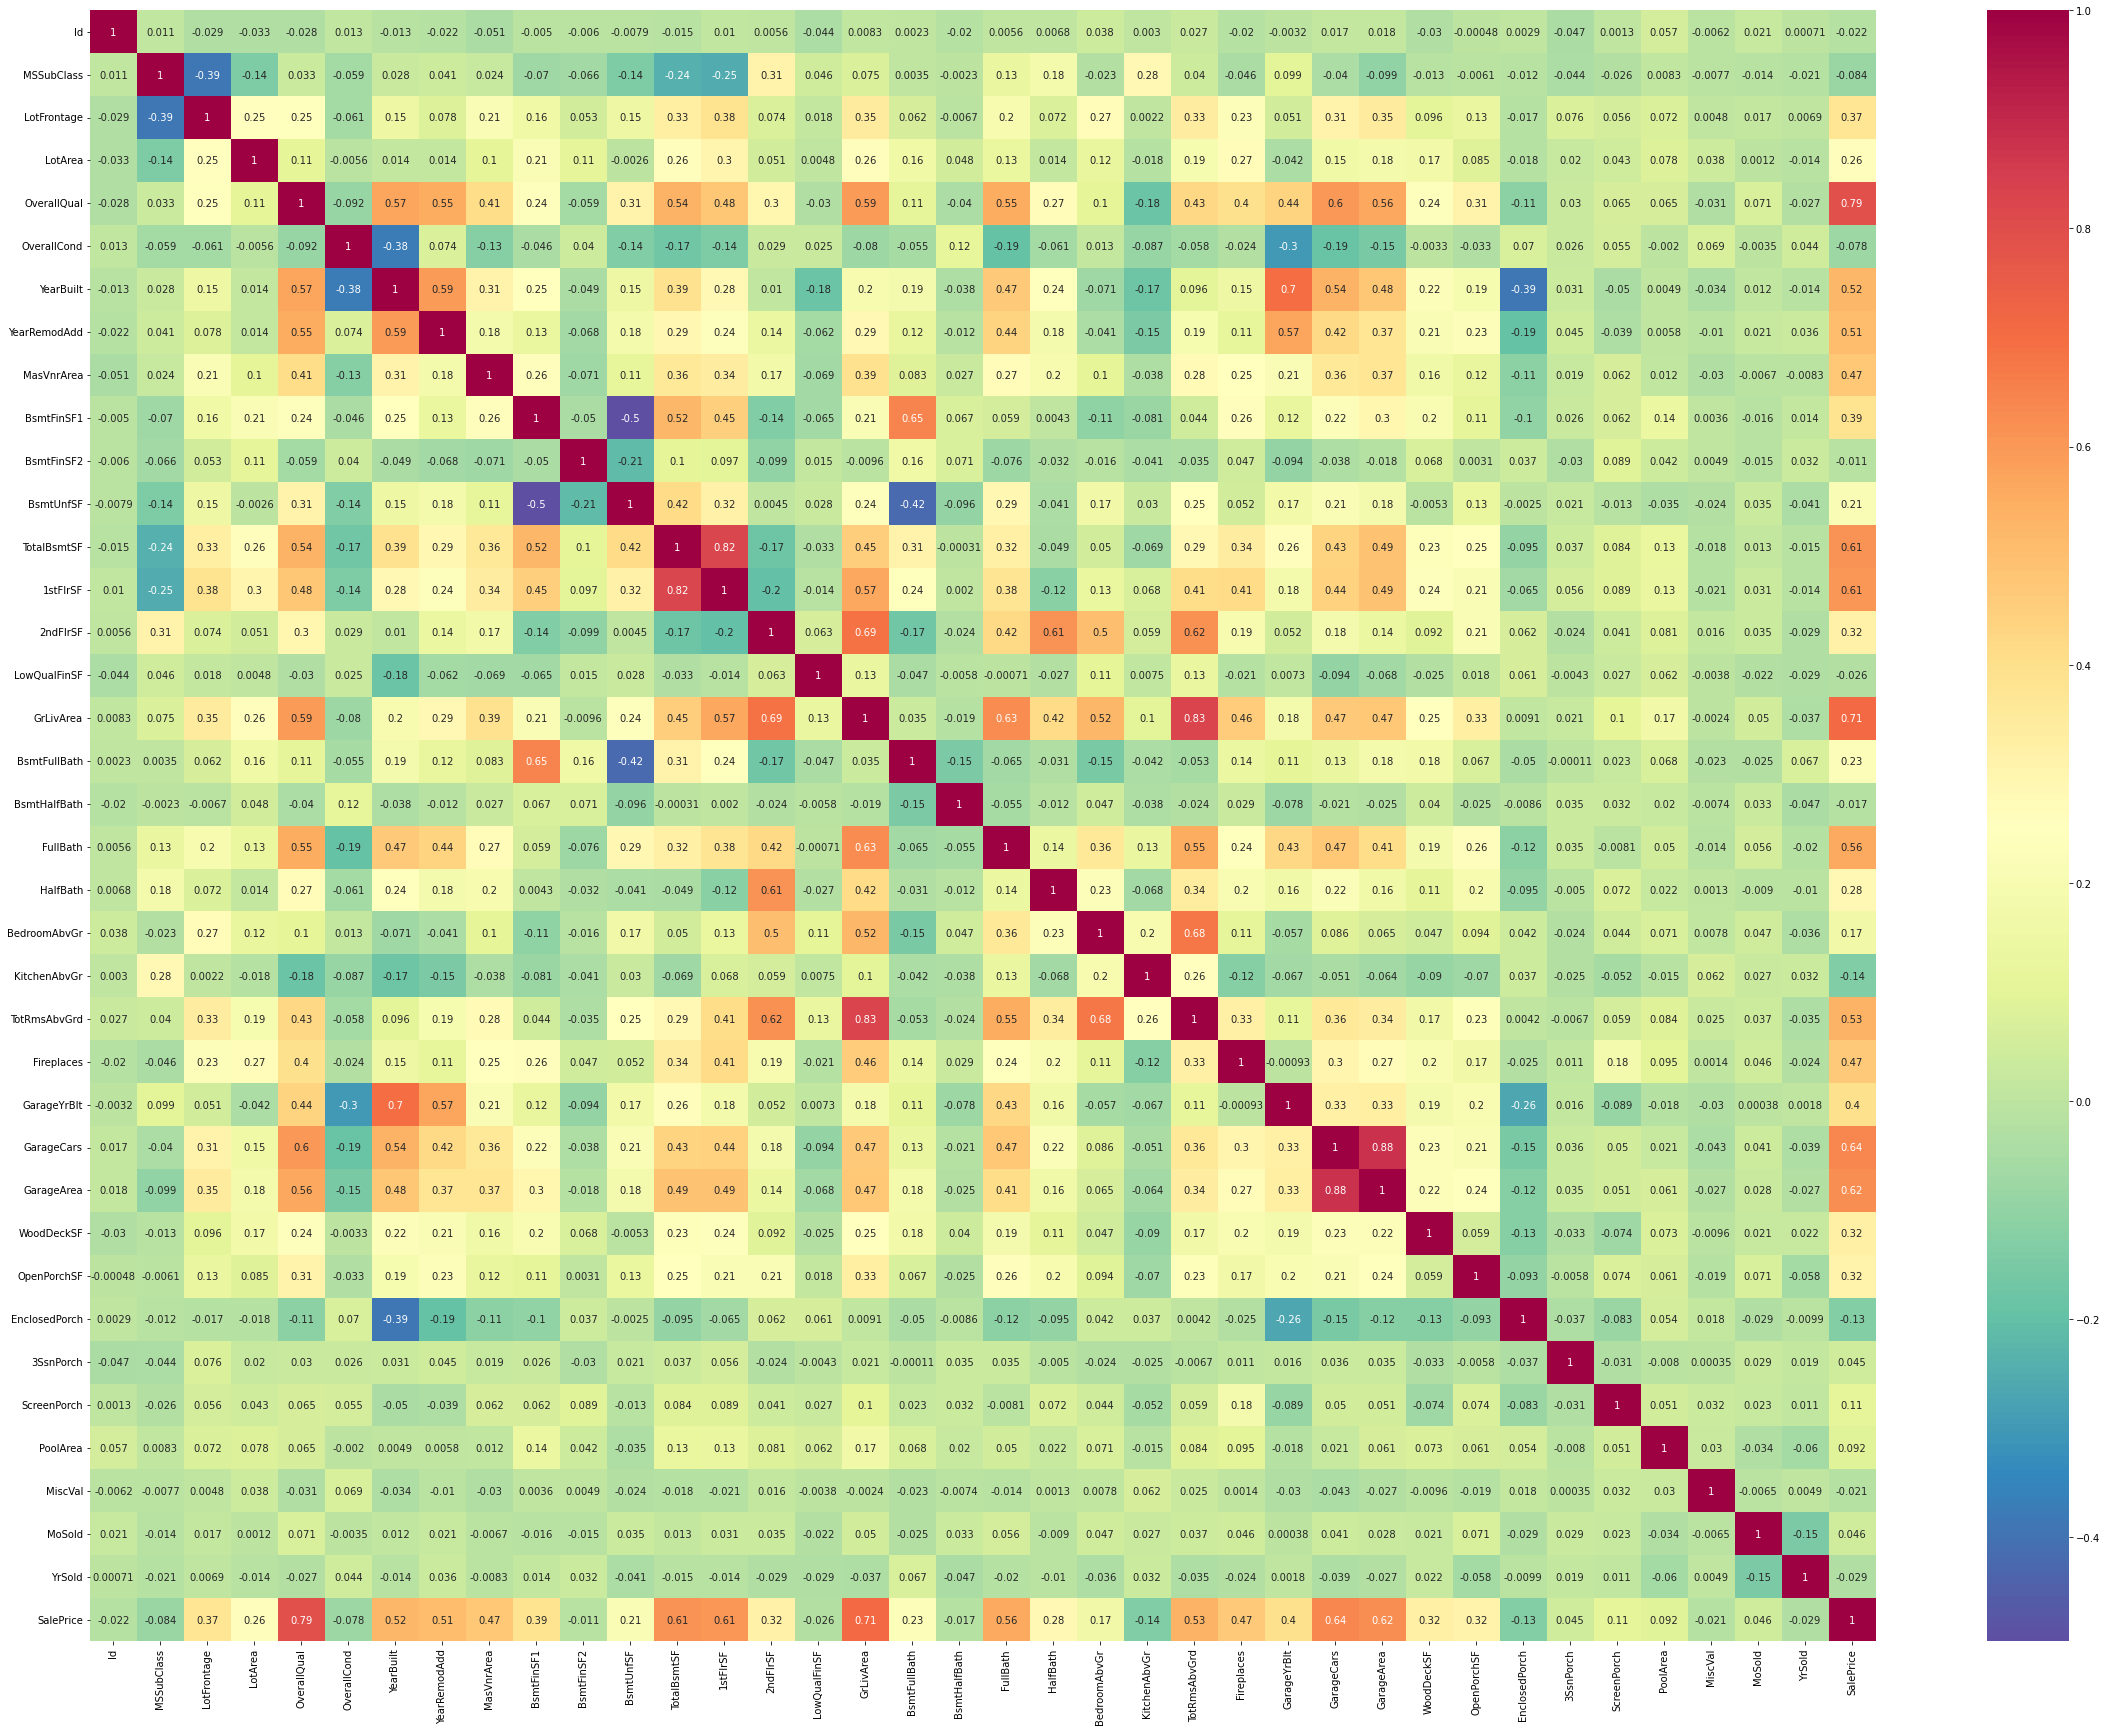

In [156]:
#making a heatmap
plt.figure(figsize=(40,30))
House_Data_corr = House_Data.corr()
sns.heatmap(House_Data_corr,cmap="Spectral_r",annot=True)

#### Observation from heatmap 

Corelation of price with independent variables

1> Price is positively corelated with overall material quality and finish, ground living area, garage size (in terms of    car capacity), garage area (in sq feet), total bsmt area (sq feet), first floor area (sq feet), num of bathrooms, total rooms    and year built. With the people interest, these are some of the factors, people consider while purchasing a house.

2>Price is negatively corelated with enclosed porch area (sq feet), type of dwelling, overall condition of the house and some more factors.


Corelation among independent variables

a>Some independent variables have high corelation namely 1st floor area and bsmt area, garage area (in terms of sq feet and cars), total rooms and living area etc

b>Some independent variables have negative corelation namely unfinished and finished basement area, bsmt full bathrooms and unfinished bsmt area etc.



### There are lot of variables so performing EDA would be challenging, So we are choosing top 10 correlated features to the price.


### Implementing heatmap for top 10 features

<AxesSubplot:>

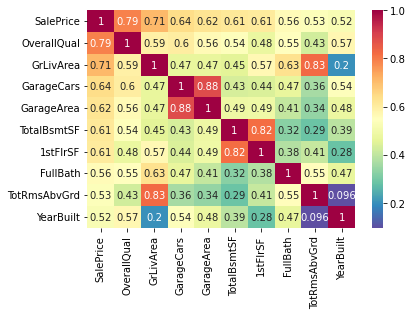

In [157]:
top_10_cols = House_Data_corr.nlargest(10,'SalePrice')['SalePrice'].index

top_10_cm = np.corrcoef(House_Data[top_10_cols].values.T)
sns.heatmap(top_10_cm,cmap="Spectral_r",annot=True, yticklabels=top_10_cols.values, xticklabels=top_10_cols.values)

### We will check for outliers

In [158]:
house_numeric_vars_1 = House_Data[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]
house_numeric_vars_2 = House_Data[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]
house_numeric_vars_3 = House_Data[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]

In [159]:
house_numeric_vars_3.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


### We will take out numeric variables

In [160]:
house_numeric_vars_to_cap = House_Data[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]
type(house_numeric_vars_to_cap)

pandas.core.frame.DataFrame

#### We will cap the values of the columns having outliers to the 95th percentile

In [161]:
for column in house_numeric_vars_to_cap.columns:
    percentiles_95 = House_Data[column].quantile([0.05,0.95]).values
    
    House_Data[column][House_Data[column] <= percentiles_95[0]] = percentiles_95[0]
    House_Data[column][House_Data[column] >= percentiles_95[1]] = percentiles_95[1]

### Replacing Yes and No values to 0 and 1

In [162]:
House_Data['CentralAir'] = House_Data['CentralAir'].map({'Y': 1, 'N': 0})

# Univariate and Bi-variate analysis of top 10 features

## 1st Feature OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

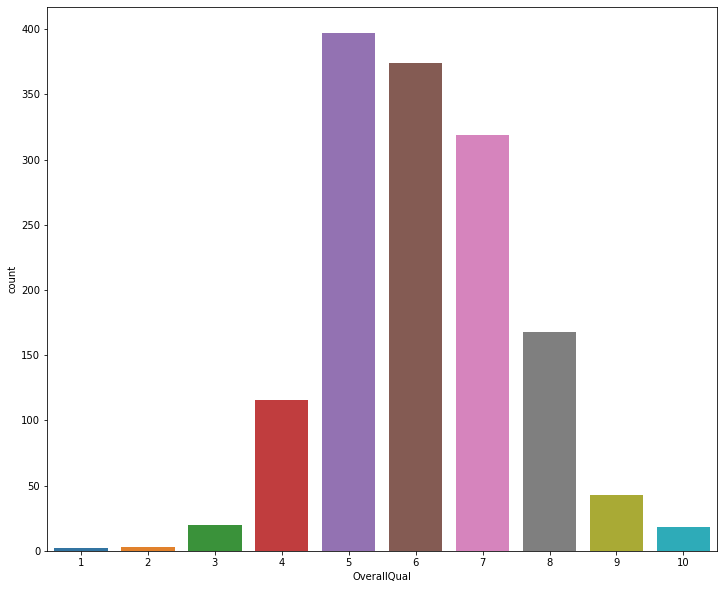

In [163]:
## Univariat analysis
plt.figure(figsize=(12,10))
sns.countplot(House_Data["OverallQual"])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

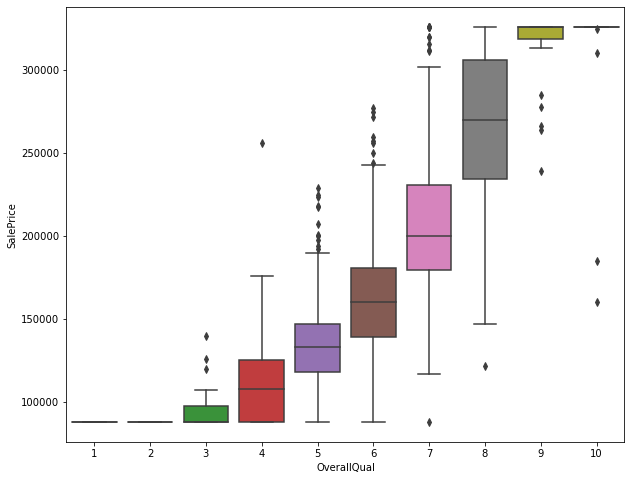

In [164]:
## Bi-variate analysis
plt.figure(figsize=(10,8))
sns.boxplot(x="OverallQual",y="SalePrice",data=House_Data)

#### Observation from above plot 
1> Most of the houses have Overall quality as 5, 6 and 7

2> People pay more for higher quality homes

## Second Feature  GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

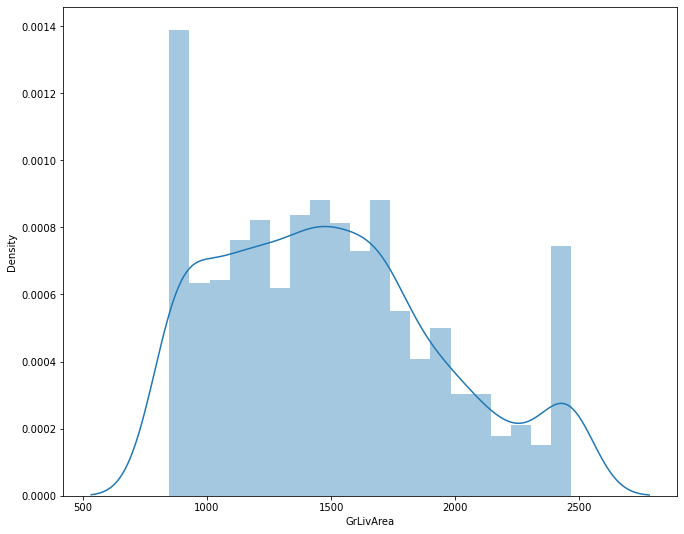

In [165]:
## Univariate analysis
plt.figure(figsize=(11,9))   # Setting figure size
sns.distplot(House_Data["GrLivArea"],bins=20)  # distplot for the variables

<Figure size 792x648 with 0 Axes>

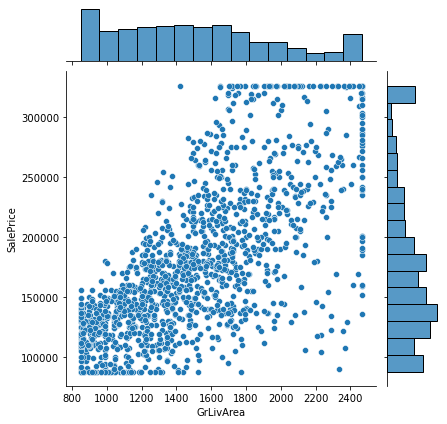

In [166]:
##Bi-variate analysis
plt.figure(figsize=(11,9))
sns.jointplot(x=House_Data["GrLivArea"],y=House_Data["SalePrice"])

### Observation from above plot

1> Most of the houses have ground living area of roughly 760-780 sq feet and second most being around 1525 sq feet

2> There is mostly linear relationship between the living area and price with some exceptions

###  Third Features GarageCars

<AxesSubplot:xlabel='GarageCars'>

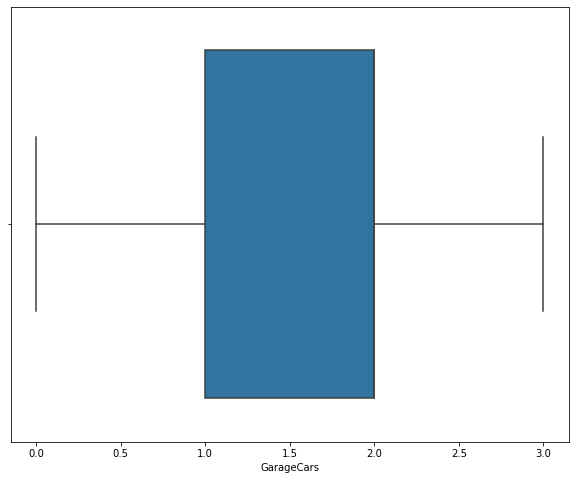

In [167]:
## Univariate Analysis
plt.figure(figsize=(10,8))
sns.boxplot(House_Data["GarageCars"])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

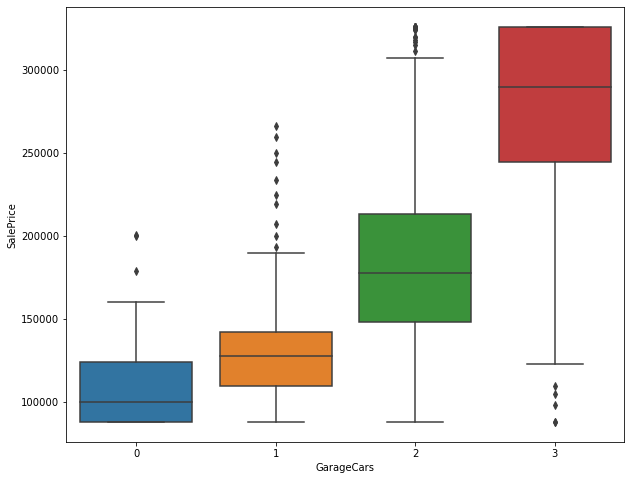

In [168]:
## Bi-variate analysis
plt.figure(figsize=(10,8))
sns.boxplot(x="GarageCars",y="SalePrice",data=House_Data)

### Obseravtion from above graph


1> Most of the houses have the capacity to store 1-2 cars

2> Houses having higher car storage capacity have higher prices

### Fourth Feature-GarageArea

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

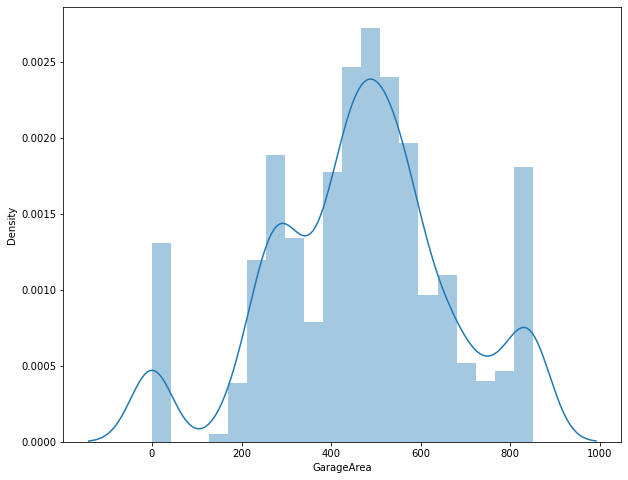

In [169]:
# Univariate analsysis
plt.figure(figsize=(10,8))
sns.distplot(House_Data["GarageArea"],bins=20)

<Figure size 720x576 with 0 Axes>

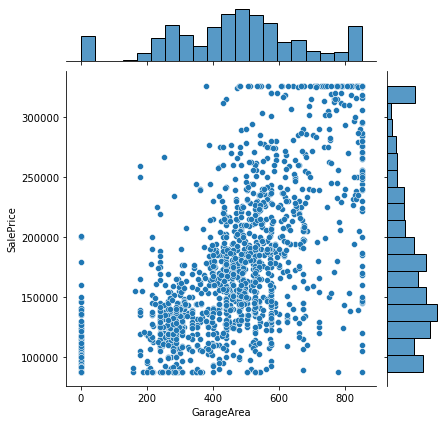

In [170]:
## Bi-variate analysis
plt.figure(figsize=(10,8))
sns.jointplot(x=House_Data["GarageArea"],y=House_Data["SalePrice"])

#### Obseravtion from above graph 

1> Most of the houses have a garage area of roughly 500 sq feet

2> There is mostly a linear relationship between the garage area and price

## Fifth Feature-TotalBsmtSF


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

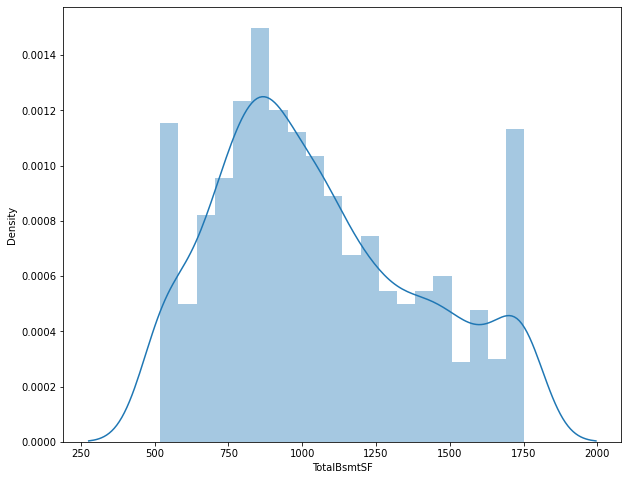

In [171]:
## Univariate analysis
plt.figure(figsize=(10,8))
sns.distplot(House_Data["TotalBsmtSF"],bins=20)

<Figure size 720x576 with 0 Axes>

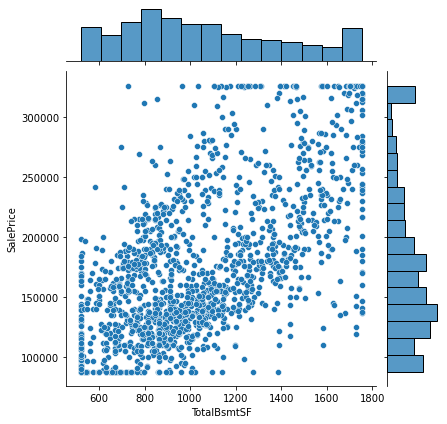

In [172]:
#Bi-variate analaysis
plt.figure(figsize=(10,8))
sns.jointplot(x=House_Data["TotalBsmtSF"],y=House_Data["SalePrice"])

### Observation from above graph

1> Most of the houses have basement area in range 875-1000 square feet

2>There is mostly a linear relationship between the basement area and price with some exceptions

### Sixth Feature-1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

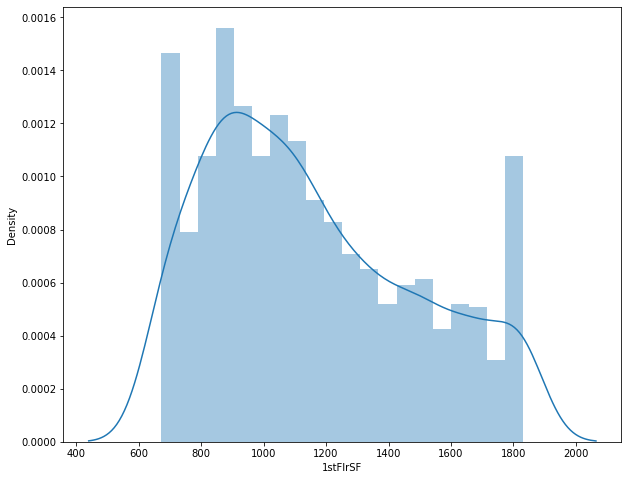

In [173]:
## Univariate analysis
plt.figure(figsize=(10,8))
sns.distplot(House_Data["1stFlrSF"],bins=20)

<Figure size 720x576 with 0 Axes>

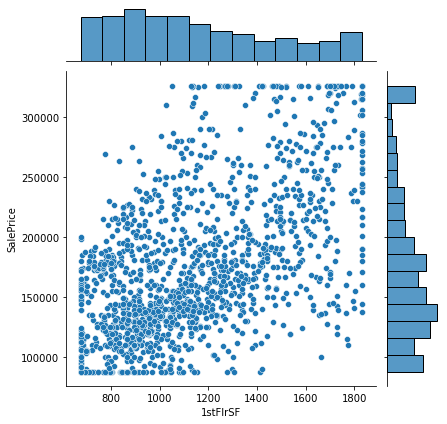

In [174]:
## Bi-variate analysis
plt.figure(figsize=(10,8))
sns.jointplot(x=House_Data["1stFlrSF"],y=House_Data["SalePrice"])

### Observation from above graph

1> Most of the houses have 1st floor area in range roughly 875-1000 sq feet

2> There is mostly a linear relationship between the 1st floor area and price with some exceptions

#### Seventh Feature-FullBath

<AxesSubplot:xlabel='FullBath', ylabel='count'>

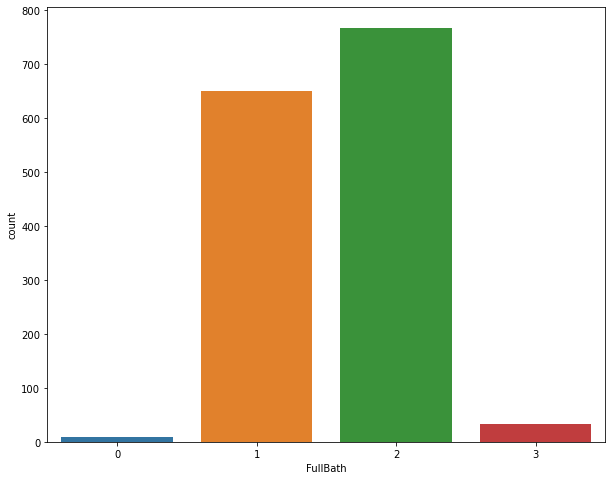

In [175]:
## Univariate analysis
plt.figure(figsize=(10,8))
sns.countplot(House_Data["FullBath"])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

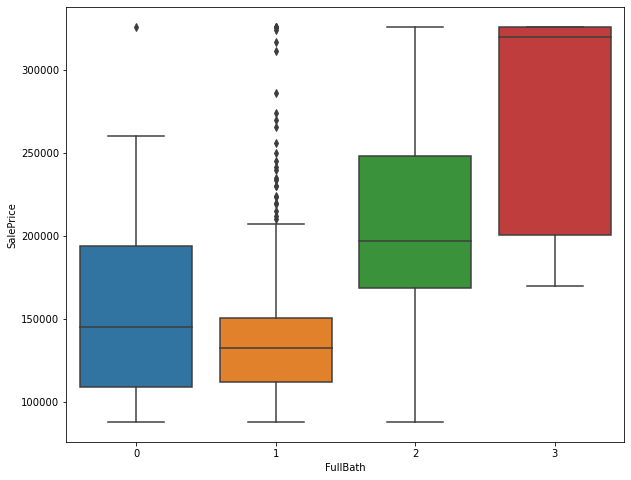

In [176]:
##Bi-variate analysis
plt.figure(figsize=(10,8))
sns.boxplot(x="FullBath",y="SalePrice",data=House_Data)

### Observation from above graph

1>Most of the houses have 2 or 1 bathrooms

2>The price increases as the num of bathrooms increase, with some exceptions

### Eighth Feature-TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

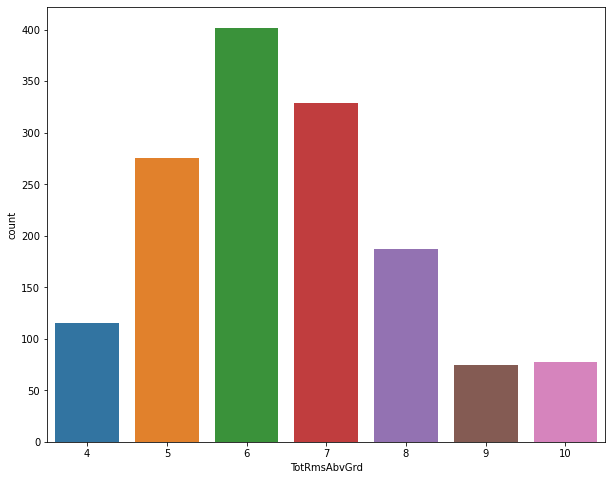

In [177]:
## Univariate analysis
plt.figure(figsize=(10,8))
sns.countplot(House_Data["TotRmsAbvGrd"])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

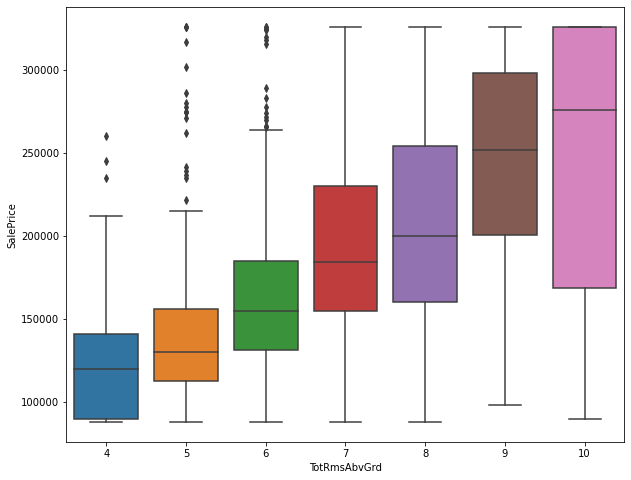

In [178]:
## Bivariate Analysis
plt.figure(figsize=(10,8))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=House_Data)

### Observation from above graph

1>Most of the houses have6 or 7 rooms

2>The price increases as the number of rooms increase with some exceptions

### Ninth Feature-YearBuilt

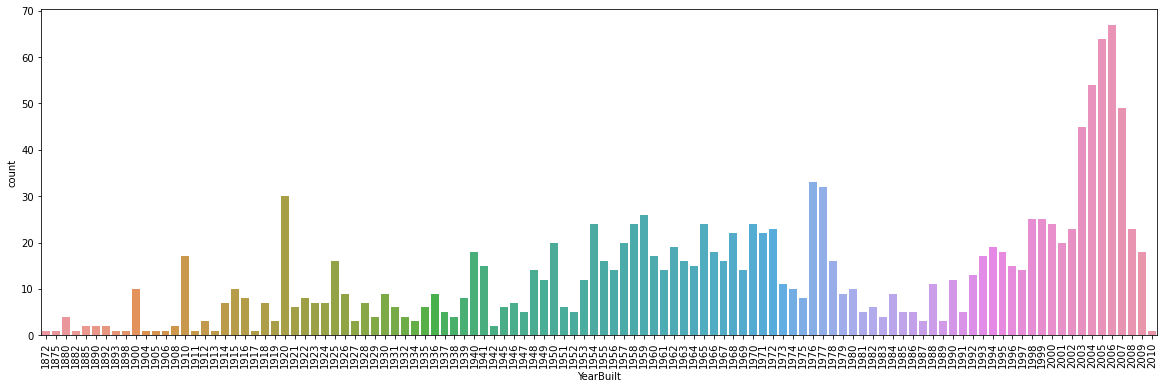

In [179]:
##Univariate analysis
plt.figure(figsize=(20,6))
sns.countplot(House_Data["YearBuilt"])
plt.xticks(rotation=90)
plt.show()

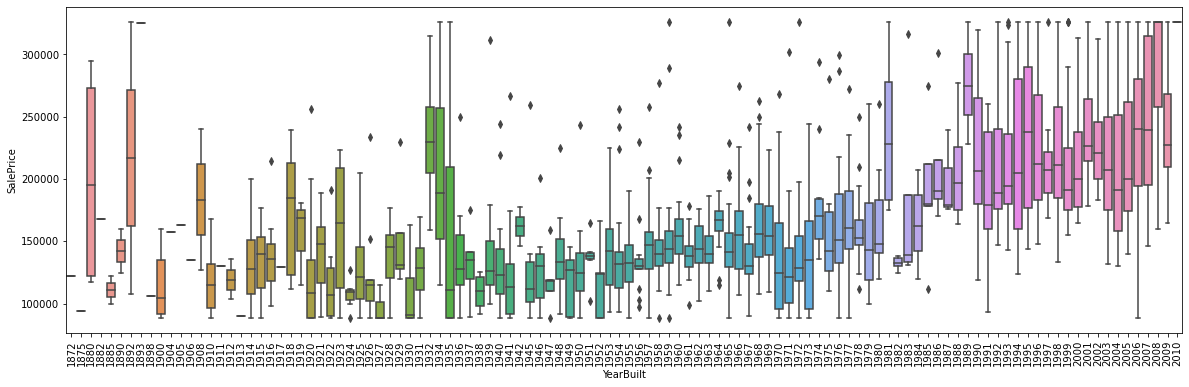

In [180]:
## Bivariate analysis
plt.figure(figsize=(20,6))
sns.boxplot(x="YearBuilt",y="SalePrice",data=House_Data)
plt.xticks(rotation=90)
plt.show()

### Observation from abobe graph

1> Most of the houses have been constructed recently(Around year 2006)

2> There is no constant pattern between the price and year.Reason can be inflation/depression in the economy in that certain year

### Dummies variable creation for categorical variables using get_dummies

In [181]:
# Listing categorical columns

house_categorical_Variables_dummy = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']


In [182]:
 ## Creating a dummy variable for the categprical variables and dropping the first one.
for column in house_categorical_Variables_dummy:
    dummy_df = pd.get_dummies(House_Data[column], prefix = column, drop_first=True)
    House_Data = pd.concat([House_Data,dummy_df],axis = 1)                                   ##Adding the results to the main dataframe

In [183]:
## Checking first five row after creation of dummies
House_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [184]:
## Dropping original categorical column because their dummies are already created
for column in house_categorical_Variables_dummy:
    House_Data = House_Data.drop(column,1)

In [185]:
## Validating column name after removing column names in above command
print(House_Data.columns)
House_Data.head()

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,1915,1970,0.0,216,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


### Feature standardisation


In [186]:
standard_scaler = StandardScaler()  ##instantiating the object

### Applying fit_transform on the variables

In [187]:
House_Data[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(House_Data[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
House_Data[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = standard_scaler.fit_transform(House_Data[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
House_Data[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = standard_scaler.fit_transform(House_Data[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])


In [188]:
House_Data.head()  # Get First firve rows for data 

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.260425,-0.355260,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,...,0,0,0,0,1,0,0,0,1,0
1,2,0.648283,-0.023731,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,...,0,0,0,0,1,0,0,0,1,0
2,3,-0.078684,0.451940,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,...,0,0,0,0,1,0,0,0,1,0
3,4,-0.563328,-0.038146,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,...,0,0,0,0,1,0,0,0,0,0
4,5,0.890605,1.319681,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,...,0,0,0,0,1,0,0,0,1,0


## Model Building 


### Division of data in trining and test data

In [189]:
x = House_Data.drop(['Id','SalePrice'],axis=1)    #Independent variables

Y = House_Data['SalePrice']           #Dependent variable

Y.head()


0    0.482420
1    0.064079
2    0.714833
3   -0.578928
4    1.125427
Name: SalePrice, dtype: float64

In [190]:
x.head() # Getting first five rows

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.260425,-0.355260,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,-0.886955,...,0,0,0,0,1,0,0,0,1,0
1,0.648283,-0.023731,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,0.330182,...,0,0,0,0,1,0,0,0,1,0
2,-0.078684,0.451940,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,-0.695091,...,0,0,0,0,1,0,0,0,1,0
3,-0.563328,-0.038146,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,-0.572178,...,0,0,0,0,1,0,0,0,0,0
4,0.890605,1.319681,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,-0.020570,...,0,0,0,0,1,0,0,0,1,0


### Dividing data into train and test set

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x,Y, train_size=0.7, test_size=0.3, random_state=100)

In [192]:
x_train.shape  # Get shape 

(1021, 265)

In [193]:
x_test.shape #Get Shape

(438, 265)

### Add constant

In [194]:
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

## 1st Training Model -Linear Regression

In [195]:
logisreg_model1 = sm.OLS(y_train, x_train_sm, family = sm.families.Binomial())
res = logisreg_model1 .fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     76.04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:54:29   Log-Likelihood:                 200.89
No. Observations:                1021   AIC:                             98.22
Df Residuals:                     771   BIC:                             1330.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.5085      0.627     -5.594      0.000      -4.740      -2.277
LotFrontage               0.0085      0.012      0.686      0.493      -0.016       0.033
LotArea                   0.0713      0.015      4.717      0.000       0.042       0.101
YearBuilt                 0.1753      0.033      5.273      0.000       0.110       0.241
YearRemodAdd              0.0554      0.015      3.793      0.000       0.027       0.084
MasVnrArea                0.0194      0.015      1.276      0.202      -0.010       0.049
BsmtFinSF1                0.0274      0.032      0.846      0.398      -0.036       0.091
BsmtFinSF2                0.0030      0.022      0.133      0.894      -0.041       0.047
BsmtUnfSF                -0.0411      0.031     -1.314      0.189      -0.103       0.020
TotalBsmtSF               0.1815      0.036      5.074      0.000       0.111       0.252
1stFlrSF                 -0.0286      0.039     -0.731      0.465      -0.105       0.048
2ndFlrSF                  0.0833      0.045      1.835      0.067      -0.006       0.172
LowQualFinSF           1.526e-14   2.91e-15      5.244      0.000    9.55e-15     2.1e-14
GrLivArea                 0.3363      0.046      7.310      0.000       0.246       0.427
BsmtFullBath              0.0182      0.012      1.508      0.132      -0.006       0.042
BsmtHalfBath             -0.0160      0.009     -1.777      0.076      -0.034       0.002
FullBath                  0.0100      0.015      0.674      0.501      -0.019       0.039
HalfBath                 -0.0198      0.027     -0.723      0.470      -0.074       0.034
BedroomAbvGr             -0.0199      0.014     -1.455      0.146      -0.047       0.007
KitchenAbvGr          -9.513e-15   3.91e-15     -2.433      0.015   -1.72e-14   -1.84e-15
TotRmsAbvGrd             -0.0109      0.019     -0.579      0.563      -0.048       0.026
Fireplaces               -0.0012      0.022     -0.053      0.958      -0.045       0.042
GarageYrBlt               0.0018      0.015      0.120      0.905      -0.028       0.032
GarageCars               -0.0088      0.024     -0.375      0.708      -0.055       0.037
GarageArea                0.0900      0.024      3.815      0.000       0.044       0.136
WoodDeckSF                0.0247      0.009      2.698      0.007       0.007       0.043
OpenPorchSF               0.0134      0.010      1.382      0.167      -0.006       0.032
EnclosedPorch             0.0040      0.010      0.412      0.681      -0.015       0.023
3SsnPorch              2.633e-14    4.5e-15      5.858      0.000    1.75e-14    3.52e-14
ScreenPorch           -1.606e-05      0.008     -0.002      0.998      -0.017       0.016
PoolArea              -5.098e-15   1.39e-15     -3.662      0.000   -7.83e-15   -2.37e-15
MiscVal                

###  Making Prediction

In [196]:
y_train_pred = res.predict(x_train_sm)
y_test_pred = res.predict(x_test_sm)

Text(0.5, 0, 'Errors')

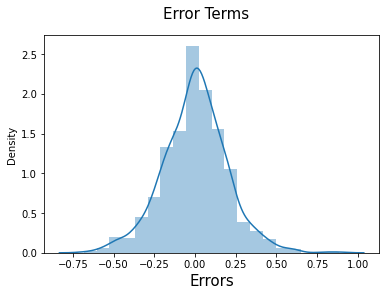

In [197]:
##calculating residuals

residual = y_train - y_train_pred

## Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)                         # X-label

### Observation 
The error terms seem to be normalized and center around 0

### Plotting y_test and y_test_pred

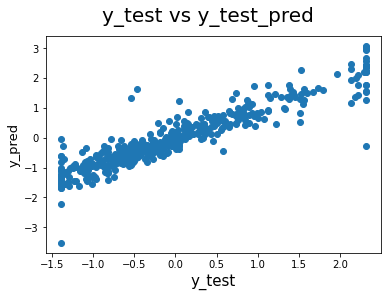

In [198]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 13)
plt.show()

#### Residual vs Predictor plot

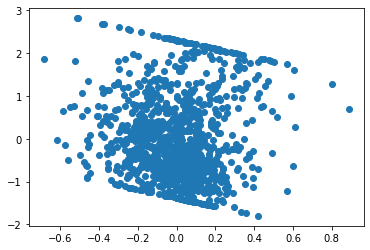

In [199]:
plt.scatter(y_train - y_train_pred, y_train_pred)
plt.show()

### Observation 
The residuals should be scattered randomly around 0 

The spread of residuals remains constant 

There are no extreme points

In [200]:
metric_linear = []

## Train R2 score

train_r2_linear= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_linear))
metric_linear.append(train_r2_linear)

## Test R2 score

test_r2_linear = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_linear))
metric_linear.append(test_r2_linear)

## Train RSS

train_rss_linear = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_linear))
metric_linear.append(train_rss_linear)

## Test RSS

test_rss_linear = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_linear))
metric_linear.append(test_rss_linear)

## Train MSE

train_mse_linear = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_linear))

## Test MSE

test_mse_linear = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_linear))

## Train RMSE

train_rmse_linear = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_linear))
metric_linear.append(train_rmse_linear)

## Test RMSE

test_rmse_linear = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_linear))
metric_linear.append(test_rmse_linear)

metric_linear

Train r2 = 0.9608731115227874
Test r2 = 0.8543246958620694
Train RSS = 40.331873137984886
Test RSS = 62.22270614922934
Train MSE = 0.03950232432711546
Test MSE = 0.14206097294344597
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


[0.9608731115227874,
 0.8543246958620694,
 40.331873137984886,
 62.22270614922934,
 0.19875191653696186,
 0.3769097676413361]

In [201]:
len(x_train.columns)

265

## Ridge Regression

In [202]:
## list of alphas to tune the parameters
#if value too high it will lead to underfitting
#if value is too low, it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs = 60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [203]:
## Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 8.0}


In [204]:
## Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(x_train, y_train)
print(ridge.coef_)

[ 1.46958687e-02  6.62682186e-02  1.13281967e-01  6.68591397e-02
  1.90594543e-02  3.47782337e-02 -2.26932528e-03 -4.39686905e-02
  1.66487304e-01 -2.75286716e-03  8.60824740e-02  0.00000000e+00
  3.06062342e-01  1.97325369e-02 -1.32534247e-02  1.72595410e-02
  8.17578588e-03 -1.66076390e-02  0.00000000e+00 -1.57320036e-02
  1.92539058e-02  1.06121339e-02  2.10294409e-02  7.08685973e-02
  2.66215163e-02  1.16310570e-02  5.80447055e-04  0.00000000e+00
  3.51779789e-03  0.00000000e+00  0.00000000e+00  7.11204393e-03
 -2.98307157e-03  5.33335551e-03  9.91161081e-03  5.06737481e-02
  1.29530067e-02 -6.48233803e-03  7.19345958e-02  5.28758107e-02
 -2.37438730e-02 -9.85794424e-03 -1.25391483e-01 -4.61338729e-02
 -9.64243166e-02 -6.13298156e-02 -9.68434894e-02  8.92552363e-02
  5.93832956e-02  4.97830875e-02 -1.28526152e-02 -2.73874474e-02
 -8.79594125e-03 -5.81552723e-02  5.86630536e-03  8.07294064e-02
  7.92688408e-02  9.92590307e-02 -2.65321589e-02  8.98250423e-02
 -4.39518142e-02 -4.41388

In [205]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

metric_ridge = []

## Train R2 score

train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge.append(train_r2_ridge)

## Test R2 score

test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge.append(test_r2_ridge)

## Train RSS

train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge.append(train_rss_ridge)

## Test RSS

test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge.append(test_rss_ridge)

## Train MSE

train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

## Test MSE

test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))

## Train RMSE

train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
metric_ridge.append(train_rmse_ridge)

## Test RMSE

test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))
metric_ridge.append(test_rmse_ridge)

metric_ridge

Train r2 = 0.94354265961746
Test r2 = 0.8944768674326166
Train RSS = 58.19604825829107
Test RSS = 45.072395136169455
Train MSE = 0.056999067833781655
Test MSE = 0.10290501172641428
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


[0.94354265961746,
 0.8944768674326166,
 58.19604825829107,
 45.072395136169455,
 0.19875191653696186,
 0.3769097676413361]

## Lasso Regression

In [206]:
lasso = Lasso()

## cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs=60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [207]:
## Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [208]:
## Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso_model = lasso.fit(x_train, y_train) 

In [209]:
lasso.coef_

array([ 1.31009607e-02,  6.74282162e-02,  1.39097452e-01,  6.49339111e-02,
        2.01022776e-02,  5.63796222e-02, -0.00000000e+00, -2.04827807e-02,
        1.45803329e-01, -1.70562135e-03,  5.97173474e-02,  0.00000000e+00,
        3.21619918e-01,  2.38555792e-02, -1.39843200e-02,  1.51525338e-02,
        4.33744571e-03, -1.87305229e-02,  0.00000000e+00, -1.40035655e-02,
        1.48231929e-02,  6.34371346e-03,  1.61905817e-02,  6.75854871e-02,
        2.80566686e-02,  8.48913141e-03,  5.74409170e-04,  0.00000000e+00,
        2.89468647e-03,  0.00000000e+00,  0.00000000e+00,  4.70136470e-03,
       -2.84593107e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.41204075e-01, -0.00000000e+00,
       -7.28904759e-02, -0.00000000e+00, -1.55216892e-01,  0.00000000e+00,
        0.00000000e+00,  2.17466229e-02, -2.42761829e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [210]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

metric_lasso = []

## Train R2 score

train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2_score = "+ str(train_r2_lasso))
metric_lasso.append(train_r2_lasso)

## Test R2 score

test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2_score = "+ str(test_r2_lasso))
metric_lasso.append(test_r2_lasso)

## Train RSS

train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso.append(train_rss_lasso)

## Test RSS

test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso.append(test_rss_lasso)

## Train MSE

train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

## Test MSE

test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))

## Train RMSE

train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
metric_lasso.append(train_rmse_lasso)

## Test RMSE

test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))
metric_lasso.append(test_rmse_lasso)

metric_lasso

Train r2_score = 0.9424639532374802
Test r2_score = 0.8885944800228901
Train RSS = 59.30797538982911
Test RSS = 47.58495596737785
Train MSE = 0.05808812476966612
Test MSE = 0.10864145198031473
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


[0.9424639532374802,
 0.8885944800228901,
 59.30797538982911,
 47.58495596737785,
 0.19875191653696186,
 0.3769097676413361]

## Theoritical Question-1

####  What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [211]:
ridge_alpha_double = 16   # Double the alpha for ridge 
lasso_alpha_double = 0.002 # Double the alpha for lasso

### Ridge Regression 

In [212]:
ridge_double = Ridge(alpha=ridge_alpha_double)
ridge_double_model = ridge_double.fit(x_train, y_train)

### Lasso Regression

In [213]:
lasso_double = Lasso(alpha=lasso_alpha_double)   
lasso_double_model = lasso_double.fit(x_train, y_train)

### Quantitive value for Ridge

In [214]:
y_train_pred = ridge_double.predict(x_train)
y_test_pred = ridge_double.predict(x_test)

metric_ridge_double = []

## Train R2 score

train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

## Test R2 score

test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)

## Train RSS

train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge_double.append(train_rss_ridge)

## Test RSS

test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge_double.append(test_rss_ridge)

## Train MSE

train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

## Test MSE

test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))

## Train RMSE

train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
metric_ridge_double.append(train_rmse_ridge)

## Test RMSE

test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))
metric_ridge_double.append(test_rmse_ridge)

metric_ridge_double

Train r2 = 0.9376208643387143
Test r2 = 0.89549204789634
Train RSS = 64.30021613942961
Test RSS = 44.63877822315523
Train MSE = 0.06297768475948051
Test MSE = 0.101915018774327
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


[0.9376208643387143,
 0.89549204789634,
 64.30021613942961,
 44.63877822315523,
 0.19875191653696186,
 0.3769097676413361]

### Quantitive value for lasso

In [215]:
y_train_pred = lasso_double.predict(x_train)
y_test_pred = lasso_double.predict(x_test)

metric_lasso_double = []

## Train R2 score
train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

## Test R2 score
test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)

## Train RSS
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso_double.append(train_rss_lasso)

## Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso_double.append(test_rss_lasso)

## Train MSE
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

## Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))

## Train RMSE
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
metric_lasso_double.append(train_rmse_lasso)

## Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))
metric_lasso_double.append(test_rmse_lasso)

metric_lasso_double

Train r2 = 0.932501886908368
Test r2 = 0.8910078399387374
Train RSS = 69.57684191653874
Test RSS = 46.554130696308455
Train MSE = 0.06814578052550317
Test MSE = 0.10628796962627501
Train RMSE = 0.19875191653696186
Test RMSE = 0.3769097676413361


[0.932501886908368,
 0.8910078399387374,
 69.57684191653874,
 46.554130696308455,
 0.19875191653696186,
 0.3769097676413361]

### Printing Ridge and Lasso coefficient

In [216]:
print(max(ridge_double_model.coef_))
print(max(lasso_double_model.coef_))

0.31750159699486113
0.7042354212019802


## Theoritical question, solution Finding

### Finding most important predictor before and after doubling the alpha

In [217]:
#Initialising the variables
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0



In [218]:
#Calculating the maximum coefficientt and most important column of ridge model

for (coef,column) in zip(ridge_model.coef_, x_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column

print("Ridge max col = ",ridge_max_col)
print("Ridge max coef = ",ridge_max_coef)

Ridge max col =  OverallQual_9
Ridge max coef =  0.3955813193971317


In [219]:
#Calculating maximum coefficient and most important column of ridge_double model

for (coef,column) in zip(ridge_double_model.coef_, x_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column
        
print("Ridge_double max col = ",ridge_double_max_col)
print("Ridge_double max coef = ",ridge_double_max_coef)


Ridge_double max col =  OverallQual_9
Ridge_double max coef =  0.31750159699486113


In [220]:
#Calculating maximum coefficient and most important column of lasso model

for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
print("Lasso max col = ",lasso_max_col)
print("Lasso max coef = ",lasso_max_coef)


Lasso max col =  OverallQual_9
Lasso max coef =  0.6832028240106427


In [221]:
#Calculating maximum coefficient and most important column of lasso_double model

for (coef,column) in zip(lasso_double_model.coef_, x_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
print("Lasso_double max col = ",lasso_double_max_col)
print("Lasso_double max coef = ",lasso_double_max_coef)



Lasso_double max col =  OverallQual_9
Lasso_double max coef =  0.7042354212019802


### Getting top 5 predictors

In [222]:
lasso_max_coef_list = []

for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [223]:
print(lasso_max_coef_list)  ## Printing lasso maximum coefficient

[-0.9310290964996295, -0.24120407543304584, -0.1705855926500978, -0.1626659402468025, -0.15521689209242065, -0.1512325804465007, -0.12645283312438038, -0.12028545601646912, -0.11746854566212354, -0.11716813001817093, -0.10266033331117409, -0.09810229337512616, -0.09650476697200902, -0.09561598894682988, -0.08746205129220881, -0.08693006357592033, -0.08438187274348845, -0.08114112709988881, -0.08044548452429191, -0.07289047586973296, -0.06748836998742744, -0.06172524353895484, -0.052811926285489114, -0.05064792944983665, -0.04867555280919433, -0.047317058598117565, -0.04295028331686369, -0.04288161256722555, -0.03907719040364133, -0.03476910045249827, -0.03457541659556376, -0.03425111410507024, -0.03357690594357099, -0.03272615914037606, -0.031031973778968686, -0.030470960881906203, -0.03035003188816547, -0.026780320929439917, -0.025126565043936965, -0.024276182929340116, -0.02266545358158975, -0.02262753211285744, -0.021970067864357786, -0.02130498144015205, -0.020482780744406206, -0.0

### Printing column name and coefficient

In [224]:
for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    print("{} {}".format(column,coef))

LotFrontage 0.01310096069607428
LotArea 0.06742821620354984
YearBuilt 0.13909745171169602
YearRemodAdd 0.0649339110632268
MasVnrArea 0.020102277599872466
BsmtFinSF1 0.05637962220439977
BsmtFinSF2 -0.0
BsmtUnfSF -0.020482780744406206
TotalBsmtSF 0.1458033293635573
1stFlrSF -0.0017056213541280572
2ndFlrSF 0.05971734743882948
LowQualFinSF 0.0
GrLivArea 0.32161991828775727
BsmtFullBath 0.023855579203886663
BsmtHalfBath -0.013984320041442573
FullBath 0.01515253381324302
HalfBath 0.004337445708801301
BedroomAbvGr -0.018730522854709088
KitchenAbvGr 0.0
TotRmsAbvGrd -0.014003565498392611
Fireplaces 0.014823192864060407
GarageYrBlt 0.00634371346374266
GarageCars 0.016190581677211713
GarageArea 0.06758548710933285
WoodDeckSF 0.0280566686138931
OpenPorchSF 0.008489131410720626
EnclosedPorch 0.000574409169860503
3SsnPorch 0.0
ScreenPorch 0.0028946864701510544
PoolArea 0.0
MiscVal 0.0
MoSold 0.004701364697328376
YrSold -0.002845931068693038
MSSubClass_30 0.0
MSSubClass_40 0.0
MSSubClass_45 0.0
MSSu

### Observation
Top 5 predictors from above details are:-

1>OverallQual_9

2>OverallCond_9

3>OverallQual_8

4>GrLivArea

5>Neighborhood_Crawfor

### Dropping above 5 variables from train data

In [225]:
x_train_excluding_top_5 = x_train.drop(['OverallQual_9','OverallCond_9','OverallQual_8','GrLivArea','Neighborhood_Crawfor'],axis=1)

### Lasso regression model


In [226]:
lasso_excluding_top_5 = Lasso(alpha=0.001)   
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(x_train_excluding_top_5, y_train)

### Determining top 5 predictors

In [227]:
lasso_max_coef_excluding_top_5_list = []

for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)
lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-1.388154798151719, -0.443061127898083, -0.43548121647427646, -0.4303533568180374, -0.3905026388024762, -0.3416900945952056, -0.24307514408680866, -0.2273821513460958, -0.2184350274754028, -0.2114705170837551, -0.20659007616271063, -0.2046876036732154, -0.20211414492183016, -0.1862923858096859, -0.18547374421954155, -0.17513505085263656, -0.16475789260247298, -0.16322609655150352, -0.1599858541873255, -0.15901993720375018, -0.15599722740658162, -0.14989958020312516, -0.1477614669161901, -0.14678852438087808, -0.14001622206667083, -0.12782097329444825, -0.09549879620318644, -0.08810562440738785, -0.08520629305580518, -0.08137241277806238, -0.0729033920290909, -0.07094428515568504, -0.06810101540380276, -0.06494912374973581, -0.06143504108101443, -0.05953596341043055, -0.05442436670806675, -0.05232824577602383, -0.05149303178535189, -0.043053336292796555, -0.04101472133552573, -0.039913643690969426, -0.03583186504582901, -0.03396462218023521, -0.029467819181498735, -0.028820687386574347

### Printing column name and coefficient

In [228]:
for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train_excluding_top_5.columns):
    print("{} {}".format(column,coef))

LotFrontage 0.014671009419285572
LotArea 0.07574956832104662
YearBuilt 0.0932868671611383
YearRemodAdd 0.07639402470907274
MasVnrArea 0.02740881305945478
BsmtFinSF1 0.06259704395381187
BsmtFinSF2 0.002885271170670018
BsmtUnfSF -0.019266849222127565
TotalBsmtSF 0.15514098106536622
1stFlrSF 0.20119703116287224
2ndFlrSF 0.2998647619091353
LowQualFinSF 0.0
BsmtFullBath 0.02154038253377547
BsmtHalfBath -0.0071641184376125214
FullBath 0.01728418962077198
HalfBath 0.011813399038234074
BedroomAbvGr -0.017801974126357135
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0027980671861465383
Fireplaces 0.03899493858787207
GarageYrBlt 0.004870888595021944
GarageCars 0.015168247840426525
GarageArea 0.07628934585572103
WoodDeckSF 0.025819183868352306
OpenPorchSF 0.011530275239051284
EnclosedPorch 0.0032556826290062197
3SsnPorch 0.0
ScreenPorch 0.0026785689385562562
PoolArea 0.0
MiscVal 0.0
MoSold 0.010542869704103517
YrSold -0.0055700404966196
MSSubClass_30 -0.0
MSSubClass_40 0.0
MSSubClass_45 0.0
MSSubClass_50 0.0
M

### Observation

#### Top 5 predictors from above details are:-

1>Condition2_PosA

2>2ndFlrSF

3>Exterior1st_BrkFace

4>Functional_Typ

5>Neighborhood_Somerst